# Report Overview

1.  [Packages](#Packages)
2.  [Methods](#Methods)
3.  [General](#General)
4.  [Task performance](#Task-performance)
    * [Math](#Math)
    * [Stroop](#Stroop)
    * [CPT](#CPT)
5.  [Eye tracking](#Eye-tracking)


## Packages
**VRAM specific**

A majority of the code used for this analysis is located in */src/Vrama* directory. Several functions included here will eventially be refactored and integrated into the source code directory.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
sns.set(style="darkgrid")
import sys
sys.path.append('../../src/Vrama')
sys.path.append('../../src')

from Vrama import DataController
from Vrama import Tables
from Vrama import Eye

import time
from scipy import stats

### Methods

PlotRT(yL,sdL,bars,color,title)

PlotAcc(count,num_correct,num_response,bars,title)

PlotTask(df,task)

GetSubjectData(subjectID)

PlotDistractionOnOff(df_on,df_off,task)


In [3]:
def PlotRT(yL,sdL,bars,color,title):
    y_pos = np.arange(len(yL))
    fig, ax = plt.subplots()
    bar = plt.bar(y_pos, yL, yerr=sdL,color = color,ecolor = color,edgecolor = color )
    plt.xticks(y_pos, bars)
    plt.ylabel('reaction time')
    plt.title(title)
    plt.show()

def PlotAcc(count,num_correct,num_response,bars,title):
    crtL = num_correct/count
    incrtL = (num_response - num_correct)/count
    noL = (count - num_response)/count

    y_pos = np.arange(len(bars))
    fig, ax = plt.subplots()

    # The x position of bars
    barWidth = 0.3
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, crtL,width = barWidth,label = 'correct')
    plt.bar(r2, incrtL,width = barWidth, label = 'incorrect')
    plt.bar(r3, noL,width = barWidth, label = 'no responses')
    plt.xticks(r2,labels = bars)

     # legend outside
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
    plt.title(title)
    plt.ylabel('%')
    plt.show()
    
def PlotTask(df,task):
    mL = df['mean_rt']
    sdL = df['sd_rt']
    bars = [task + ' block 1',task + ' block 2',task + ' block 3']
    color = 'steelblue'
    title = task + ' Reaction time'
    PlotRT(mL,sdL,bars,color,title)

    count = df['count']
    num_correct = df['num_correct']
    num_response = df['num_responses']
    title = task + ' accuracy'
    PlotAcc(count,num_correct,num_response,bars,title)
    
    
def GetSubjectData(subjectID):
    dfAll = Eye.LoadEyeData(subjectID)
    dfList = Eye.GetDfList(dfAll)
    df_scores_all = pd.DataFrame()
    df_scores_on = pd.DataFrame()
    df_scores_off = pd.DataFrame()

    for i in dfList:
        df = Eye.PreProcessDf(i)
        dfOn = Eye.GetDistractorOn(df)
        dfOff = Eye.GetDistractorOff(df)
        df_scores_all = df_scores_all.append(Eye.GetScores(df,df))
        df_scores_on = df_scores_on.append(Eye.GetScores(dfOn,df))
        df_scores_off = df_scores_off.append(Eye.GetScores(dfOff,df))

        data_dict = {   'subjectID': subjectID,
                    'dfAll': dfAll,
                    'df_scores_all':df_scores_all,
                    'df_scores_on':df_scores_on,
                    'df_scores_off':df_scores_off           
                        }
    return data_dict

def PlotDistractionOnOff(df_on,df_off,task):
    count = df_on['count']
    num_correct = df_on['num_correct']
    crt_onL = num_correct/count

    count = df_off['count']
    num_correct = df_off['num_correct']
    crt_offL = num_correct/count

    # 
    bars = ['block 1','block 2','block 3']
    
    y_pos = np.arange(len(bars))
    fig, ax = plt.subplots()


    # the x position of bars
    barWidth = 0.3
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]

   

    # plot
    plt.bar(r1, crt_offL,width = barWidth,label = 'Off',color = "skyblue")
    plt.bar(r2, crt_onL,width = barWidth, label = 'On', color = "lightsalmon")
    plt.xticks(r2,labels = bars)
    
    # legend outside
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
    plt.title(task + ": Distraction On vs Off by Block")
    plt.ylabel('%')
    plt.show()

## General

In [16]:
subject = '19201'
Tables.GetSubjectSessionCount(subject)

,subject,date,SessionType,math,axcpt,stroop
0,19201,02_11_2019,Baseline,2,3,3
1,19201,02_12_2019,Baseline,1,1,0
2,19201,04_11_2019,Midpoint,3,3,3


In [37]:
# cpt
fpath = '../../data/processed/vive/vive_cpt_count_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_cpt = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)
df_cpt[df_cpt.SessionType == 'Midpoint']


fpath = '../../data/processed/vive/vive_cpt_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_cpt_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_cpt_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_cpt_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

# math
fpath = '../../data/processed/vive/vive_math_count_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_math = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_math_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_math_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_math_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_math_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

# stroop
fpath = '../../data/processed/vive/vive_stroop_count_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_stroop = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_stroop_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_stroop_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_stroop_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_all = df_all[df_all.SessionType == 'Midpoint']
df_stroop_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

## Task performance

For each task type, we show the following:

* Results table
* Reaction time by block
* Performance by block (correct, incorrect, no response)
* Peformance by block (Distraction Off vx Distraction On)

### Math

In [38]:
df_math

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19201,04_11_2019_05_11_37,Midpoint,32,233.7116,14,16,32,21,5.527168,5.770894,4.895373,5.648813
1,19201,04_11_2019_05_34_19,Midpoint,36,239.5322,19,13,36,25,4.687306,4.730376,3.666478,3.177597
2,19201,04_11_2019_05_51_30,Midpoint,39,237.9905,25,12,39,29,4.170510,3.826727,4.052315,3.966068


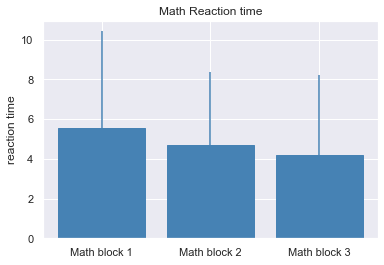

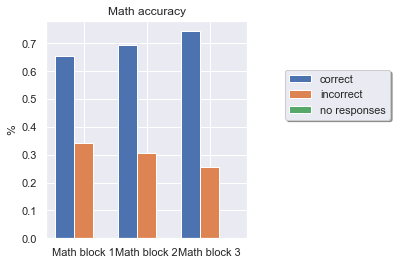

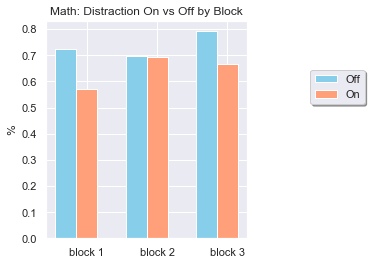

In [39]:
PlotTask(df_math,'Math')
PlotDistractionOnOff(df_math_on,df_math_off,"Math")

### Stroop

In [40]:
df_stroop

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19201,04_11_2019_05_02_12,Midpoint,82,236.3648,24,25,55,43,1.562177,1.521524,0.367641,0.345837
1,19201,04_11_2019_05_16_01,Midpoint,88,236.0695,37,27,66,61,1.641635,1.645998,0.478304,0.454251
2,19201,04_11_2019_05_38_34,Midpoint,91,235.9695,34,29,64,58,1.621536,1.591363,0.438294,0.425814


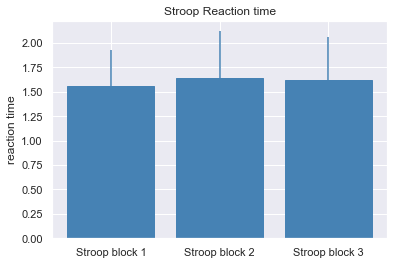

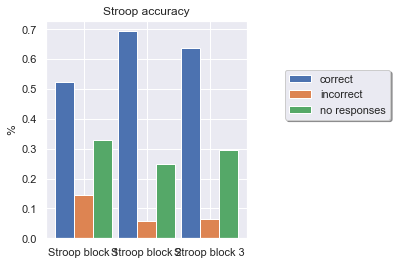

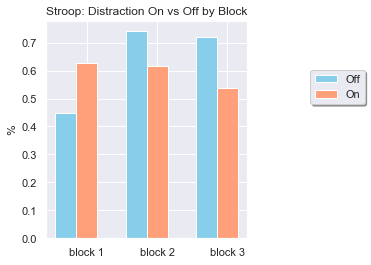

In [41]:
PlotTask(df_stroop,"Stroop")
PlotDistractionOnOff(df_stroop_on,df_stroop_off,"Stroop")

#### CPT

In [42]:
df_cpt

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19201,04_11_2019_05_06_50,Midpoint,102,232.5527,25,10,40,28,0.610725,0.641068,0.206232,0.183510
1,19201,04_11_2019_05_29_41,Midpoint,101,232.6414,38,12,55,43,0.610629,0.597685,0.291067,0.305076
2,19201,04_11_2019_05_47_08,Midpoint,110,232.6089,51,5,61,38,0.865983,0.921939,0.582119,0.656008


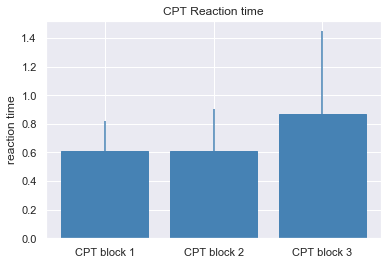

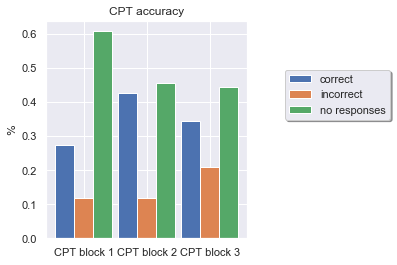

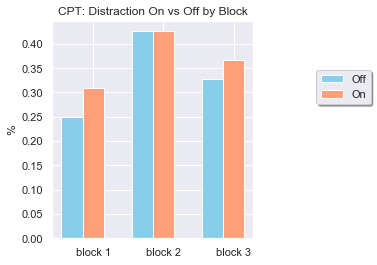

In [43]:
PlotTask(df_cpt,"CPT")
PlotDistractionOnOff(df_cpt_on,df_cpt_off,"CPT")

## Eye tracking

In [46]:
df = Eye.LoadEyeData(subject)
df = Eye.PreProcessDf(df)
dfOn = Eye.GetDistractorOn(df)
dfOff = Eye.GetDistractorOff(df)
df_hold = pd.DataFrame()
df_hold['object'] = df['Active Gaze Object Name']
df_hold['deltaTime'] = df['deltaTime']
df_object_duration = df_hold.groupby('object').sum().reset_index()
df_object_type_duration = Eye.GetObjectDurDf2(df_object_duration,df)
dfByType_p = df_object_type_duration.groupby('Type').sum().apply(lambda x:100 * x / float(x.sum())).reset_index()
dfByType_s = df_object_type_duration.groupby('Type').sum().reset_index()

/Users/jaredstokes/anaconda3/envs/vram/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


#### Overall view duration table

**Table variables**
* Task duration
* % time gaze on distractor objects
* % time gaze on other environment objects
* % time gaze on whiteboard
* Time (ms) gaze on distractor objects
* Time (ms) gaze on other environment objects
* Time (ms) gaze on whiteboard
* List of all gaze objects
* List of all distractor objects




In [47]:
df_scores_all = Eye.GetScores(df,df).drop(columns='Task_name')
df_scores_on = Eye.GetScores(dfOn,df).drop(columns='Task_name')
df_scores_off = Eye.GetScores(dfOff,df).drop(columns='Task_name')

distractorsL = df_scores_all['Distractor_list']
objectsL = df_scores_all['Object_list']
df_scores_all

,Task_duration(min),View_duration_distractor(%),View_duration_other(%),View_duration_whiteboard(%),View_duration_distractor(ms),View_duration_other(ms),View_duration_whiteboard(ms),Object_list,Distractor_list
0,36.251911,3.794968,40.922454,55.282577,82544.9122,890110.3082,1.202459e+06,"[WhiteBoardWithDisplay, Null, FrontWall, White...","[nan, Child009, Child002, Child001, iPhoneX, i..."


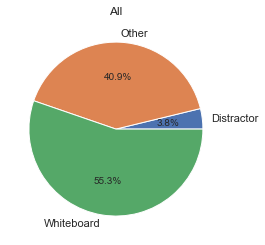

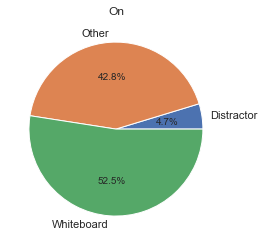

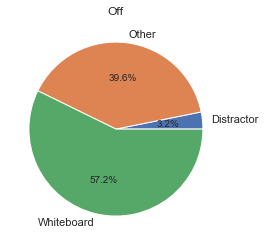

In [49]:
dur = df_scores_all.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('All')
plt.show()

dur = df_scores_on.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('On')
plt.show()

dur = df_scores_off.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Off')
plt.show()

In [34]:
pd.DataFrame({'distractors':distractorsL[0]}).drop([0])

,distractors
1,iPhoneX
2,Pedestrian
3,BusSouth
4,Child009
5,Child002
6,Child006
7,Child001
8,BusNorth
9,iPhoneX2
10,NewestTeacher


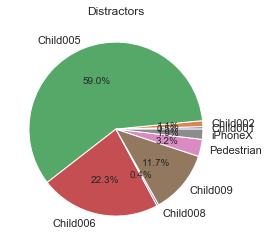

In [50]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'distractor']
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Distractors')
plt.show()

In [51]:
pd.DataFrame({'classroom objects':objectsL[0]}).drop([0])

,classroom objects
1,Null
2,FrontWall
3,Whiteboard1
4,Quinn
5,ProjectorPodium
6,Child006
7,Alexander
8,Chair_GRP007
9,Chair_GRP009
10,Child009


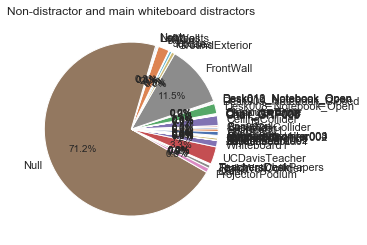

In [52]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'other']
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Non-distractor and main whiteboard distractors')
plt.show()

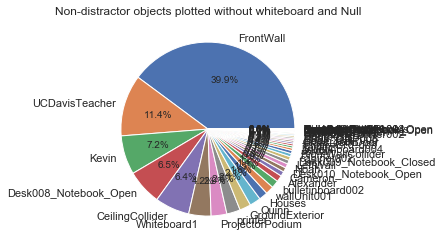

In [53]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'other']
df_hold = df_hold[df_hold.Name != 'Null']
df_hold = df_hold.sort_values(by='Duration',ascending=False)
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Non-distractor objects plotted without whiteboard and Null')
plt.show()

Table output organized by object type

In [54]:
df_object_type_duration.sort_values(by='Type').reset_index(drop=True)

,Name,Duration,Type
0,Pedestrian,2.631735e+03,distractor
1,iPhoneX,1.558898e+03,distractor
2,Child009,9.687310e+03,distractor
3,Child008,2.933007e+02,distractor
4,Child006,1.842480e+04,distractor
5,Child005,4.866968e+04,distractor
6,Child002,9.035295e+02,distractor
7,Child001,3.756571e+02,distractor
8,Zayden,3.776843e+02,other
9,Whiteboard1,1.062407e+04,other


Table output ordered high-to-low by view duration

In [55]:
total_dt = df_object_type_duration.Duration.sum()
df_object_type_duration['Percentage'] = df_object_type_duration.Duration/total_dt
df_object_type_duration.sort_values(by='Percentage',ascending=False).reset_index(drop=True)

,Name,Duration,Type,Percentage
0,WhiteBoardWithDisplay,1.202459e+06,white board,0.552826
1,Null,6.341127e+05,other,0.291531
2,FrontWall,1.020154e+05,other,0.046901
3,Child005,4.866968e+04,distractor,0.022376
4,UCDavisTeacher,2.918883e+04,other,0.013419
5,Kevin,1.854554e+04,other,0.008526
6,Child006,1.842480e+04,distractor,0.008471
7,Desk008_Notebook_Open,1.674744e+04,other,0.007700
8,CeilingCollider,1.639399e+04,other,0.007537
9,Whiteboard1,1.062407e+04,other,0.004884
